In [1]:
import scipy 


In [2]:
print(scipy.__version__)


1.9.1


In [5]:
from scipy import constants
print(constants.Boltzmann)


1.380649e-23


# all constant module

In [4]:
from scipy import constants

print(dir(constants))

['Avogadro', 'Boltzmann', 'Btu', 'Btu_IT', 'Btu_th', 'ConstantWarning', 'G', 'Julian_year', 'N_A', 'Planck', 'R', 'Rydberg', 'Stefan_Boltzmann', 'Wien', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_codata', '_constants', '_obsolete_constants', 'acre', 'alpha', 'angstrom', 'arcmin', 'arcminute', 'arcsec', 'arcsecond', 'astronomical_unit', 'atm', 'atmosphere', 'atomic_mass', 'atto', 'au', 'bar', 'barrel', 'bbl', 'blob', 'c', 'calorie', 'calorie_IT', 'calorie_th', 'carat', 'centi', 'codata', 'constants', 'convert_temperature', 'day', 'deci', 'degree', 'degree_Fahrenheit', 'deka', 'dyn', 'dyne', 'e', 'eV', 'electron_mass', 'electron_volt', 'elementary_charge', 'epsilon_0', 'erg', 'exa', 'exbi', 'femto', 'fermi', 'find', 'fine_structure', 'fluid_ounce', 'fluid_ounce_US', 'fluid_ounce_imp', 'foot', 'g', 'gallon', 'gallon_US', 'gallon_imp', 'gas_constant', 'gibi', 'giga', 'golden', 'golden_ratio', 'grain', '

# optimization
take 2 argument function , and x0 - an initial guess for the root.



In [7]:
from scipy.optimize import root
from math import cos
def eqn(x):
    return x + cos(x)
myroot=root(eqn, 1)
print(myroot.x)
print(myroot)

[-0.73908513]
    fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([2.57793786e-13])
       r: array([-1.67361203])
  status: 1
 success: True
       x: array([-0.73908513])


# minimizing a function

# 1. minima low point

In [10]:
from scipy.optimize import minimize

def eqn(x):
    return x**2 + x + 2

mymin = minimize(eqn, 0, method='BFGS')

print(mymin)


      fun: 1.75
 hess_inv: array([[0.50000001]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 8
      nit: 2
     njev: 4
   status: 0
  success: True
        x: array([-0.50000001])


In [13]:
from scipy.optimize import minimize

def objective_function(x):
    return (x[0] - 1)**2 + (x[1] - 2.5)**2

initial_guess = [0, 0]
result = minimize(objective_function, initial_guess, method='trust-constr')

print("Minimum found at:", result.x)
print("Minimum value:", result.fun)


Minimum found at: [0.99999999 2.49999999]
Minimum value: 1.6864937366171232e-16


# sparse matrix

In [15]:
import numpy as np
from scipy.sparse import csr_matrix

arr = np.array([[0, 0, 0], [0, 0, 1], [1, 0, 2]])

print(csr_matrix(arr))


  (1, 2)	1
  (2, 0)	1
  (2, 2)	2


# for removing zero

In [16]:
import numpy as np
from scipy.sparse import csr_matrix

arr = np.array([[0, 0, 0], [0, 0, 1], [1, 0, 2]])

mat = csr_matrix(arr)
mat.eliminate_zeros()

print(mat)


  (1, 2)	1
  (2, 0)	1
  (2, 2)	2


In [18]:
import numpy as np
from scipy.sparse import csr_matrix

arr = np.array([[0, 0, 0], [0, 0, 0], [2, 0, 2]])

mat = csr_matrix(arr)
mat.sum_duplicates()

print(mat)

  (2, 0)	2
  (2, 2)	2


# to csc

In [19]:
import numpy as np
from scipy.sparse import csr_matrix

arr = np.array([[0, 0, 0], [0, 0, 1], [1, 0, 2]])

newarr = csr_matrix(arr).tocsc()

print(newarr)

  (2, 0)	1
  (1, 2)	1
  (2, 2)	2


In [22]:
import numpy as np
from scipy.sparse import csc_matrix

# Define the data, row indices, and column pointers
data = np.array([1, 2, 3, 4, 5, 6])  # Non-zero values
row_indices = np.array([0, 1, 1, 2, 2, 2])  # Row indices of non-zero values
col_pointers = np.array([0, 2, 3, 6])  # Pointers to start of columns in data and row_indices

# Create the CSC matrix
csc_matrix_example = csc_matrix((data, row_indices, col_pointers), shape=(3, 3))

# Print the CSC matrix
print("CSC Matrix:")
print(csc_matrix_example)


CSC Matrix:
  (0, 0)	1
  (1, 0)	2
  (1, 1)	3
  (2, 2)	4
  (2, 2)	5
  (2, 2)	6


# coo

In [23]:
import numpy as np
from scipy.sparse import coo_matrix

# Define the data, row indices, and column indices
data = np.array([1, 2, 3, 4, 5])  # Non-zero values
row_indices = np.array([0, 1, 1, 2, 2])  # Row indices of non-zero values
col_indices = np.array([0, 1, 2, 0, 2])  # Column indices of non-zero values

# Create the COO matrix
coo_matrix_example = coo_matrix((data, (row_indices, col_indices)), shape=(3, 3))

# Print the COO matrix
print("COO Matrix:")
print(coo_matrix_example)


COO Matrix:
  (0, 0)	1
  (1, 1)	2
  (1, 2)	3
  (2, 0)	4
  (2, 2)	5


# adjecency matrix

The number of connected components in the graph is 1. This means that the entire graph is connected; there are no disconnected subsets of vertices.
The array [0, 0, 0] indicates the connected component each vertex belongs to. Since all vertices have the same label (0), it implies that they all belong to the same connected component. This suggests that all vertices in the graph are reachable from each other, directly or indirectly.


In [5]:
import numpy as np
from scipy.sparse.csgraph import connected_components
from scipy.sparse import csr_matrix

arr = np.array([
  [1, 1, 2],
  [1, 1, 3],
  [2, 0, 5]
])

newarr = csr_matrix(arr)

print(connected_components(newarr))


(1, array([0, 0, 0]))


# Dijkstra

It takes following arguments:

return_predecessors: boolean (True to return whole path of traversal otherwise False).
indices: index of the element to return all paths from that element only.
limit: max weight of path.

The first element of the tuple (array([0., 1., 2.])) represents the shortest distances from the source vertex (index 0) to all other vertices in the graph.

The second element of the tuple (array([-9999, 0, 0])) represents the predecessors of each vertex on the shortest path from the source vertex (index 0) to that vertex.
The predecessor of vertex 0 (the source vertex) is set to a special value -9999 (indicating that it has no predecessor, as it's the starting point).


In [6]:
import numpy as np
from scipy.sparse.csgraph import dijkstra
from scipy.sparse import csr_matrix

arr = np.array([
  [0, 1, 2],
  [1, 0, 0],
  [2, 0, 0]
])

newarr = csr_matrix(arr)

print(dijkstra(newarr, return_predecessors=True, indices=0))


(array([0., 1., 2.]), array([-9999,     0,     0]))


# Floyd-Warshall algorithm

This matrix represents the shortest distances between all pairs of vertices in the graph.

The predecessors matrix:
This matrix represents the predecessors on the shortest paths from each vertex to every other vertex.
Each entry predecessors[i][j] contains the predecessor vertex of vertex j on the shortest path from vertex i to vertex j

In [7]:
import numpy as np
from scipy.sparse.csgraph import floyd_warshall
from scipy.sparse import csr_matrix

arr = np.array([
  [0, 1, 2],
  [1, 0, 0],
  [2, 0, 0]
])

newarr = csr_matrix(arr)

print(floyd_warshall(newarr, return_predecessors=True))

(array([[0., 1., 2.],
       [1., 0., 3.],
       [2., 3., 0.]]), array([[-9999,     0,     0],
       [    1, -9999,     0],
       [    2,     0, -9999]]))


# Bellman Ford


In [8]:
import numpy as np
from scipy.sparse.csgraph import bellman_ford
from scipy.sparse import csr_matrix

arr = np.array([
  [0, -1, 2],
  [1, 0, 0],
  [2, 0, 0]
])

newarr = csr_matrix(arr)

print(bellman_ford(newarr, return_predecessors=True, indices=0))

(array([ 0., -1.,  2.]), array([-9999,     0,     0]))


# Depth First Order
This function takes following arguments:

the graph.
the starting element to traverse graph from.

In [10]:
import numpy as np
from scipy.sparse.csgraph import depth_first_order
from scipy.sparse import csr_matrix

arr = np.array([
  [0, 1, 0, 1],
  [1, 1, 1, 1],
  [2, 1, 1, 0],
  [0, 1, 0, 1]
])

newarr = csr_matrix(arr)

print(depth_first_order(newarr, 2))

(array([2, 0, 1, 3]), array([    2,     0, -9999,     1]))


# Breadth First Order


In [11]:
import numpy as np
from scipy.sparse.csgraph import breadth_first_order
from scipy.sparse import csr_matrix

arr = np.array([
  [0, 1, 0, 1],
  [1, 1, 1, 1],
  [2, 1, 1, 0],
  [0, 1, 0, 1]
])

newarr = csr_matrix(arr)

print(breadth_first_order(newarr, 1))

(array([1, 0, 2, 3]), array([    1, -9999,     1,     1]))


# SciPy Spatial Data

points[:,0] and points[:,1] represent the x and y coordinates of the points, respectively. Here, points[:,0] extracts all x-coordinates and points[:,1] extracts all y-coordinates.

points[:, 0] and points[:, 1] extract the x and y coordinates from the points array.
color='r' specifies the color of the markers in the scatter plot. In this case, 'r' stands for red.

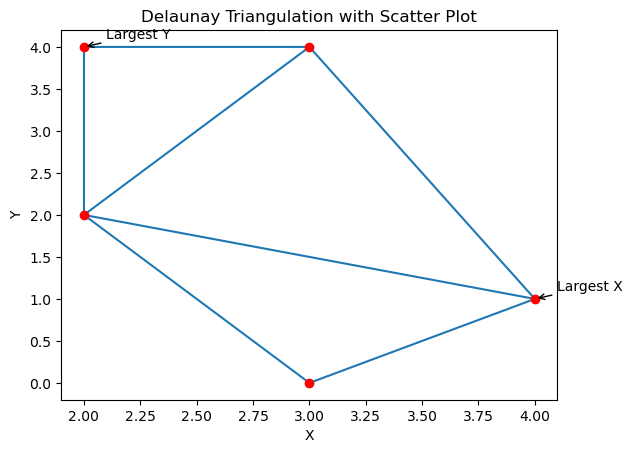

In [3]:
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
import numpy as np
points = np.array([
  [2, 4],
  [3, 4],
  [3, 0],
  [2, 2],
  [4, 1]
])
simplices = Delaunay(points).simplices
plt.triplot(points[:, 0], points[:, 1], simplices)
plt.scatter(points[:, 0], points[:, 1], color='r')
largest_x_index = np.argmax(points[:, 0])
largest_y_index = np.argmax(points[:, 1])

# Annotate the point with the largest x-coordinate
plt.annotate('Largest X', xy=(points[largest_x_index, 0], points[largest_x_index, 1]), xytext=(points[largest_x_index, 0] + 0.1, points[largest_x_index, 1] + 0.1),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )

# Annotate the point with the largest y-coordinate
plt.annotate('Largest Y', xy=(points[largest_y_index, 0], points[largest_y_index, 1]), xytext=(points[largest_y_index, 0] + 0.1, points[largest_y_index, 1] + 0.1),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Delaunay Triangulation with Scatter Plot')
plt.show()


# ConvexHull

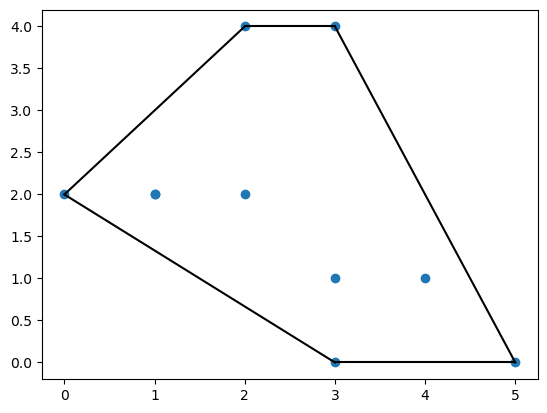

In [4]:
import numpy as np
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt

points = np.array([
  [2, 4],
  [3, 4],
  [3, 0],
  [2, 2],
  [4, 1],
  [1, 2],
  [5, 0],
  [3, 1],
  [1, 2],
  [0, 2]
])

hull = ConvexHull(points)
hull_points = hull.simplices

plt.scatter(points[:,0], points[:,1])
for simplex in hull_points:
  plt.plot(points[simplex,0], points[simplex,1], 'k-')

plt.show()


# KDTrees

The query() method returns the distance to the nearest neighbor and the location of the neighbors.




In [5]:
from scipy.spatial import KDTree

points = [(1, -1), (2, 3), (-2, 3), (2, -3)]

kdtree = KDTree(points)

res = kdtree.query((1, 1))

print(res)


(2.0, 0)


# Euclidean Distance


In [6]:
from scipy.spatial.distance import euclidean

p1 = (1, 0)
p2 = (10, 2)

res = euclidean(p1, p2)

print(res)


9.219544457292887


# Cityblock Distance (Manhattan Distance)


In [7]:
from scipy.spatial.distance import cityblock

p1 = (1, 0)
p2 = (10, 2)

res = cityblock(p1, p2)

print(res)


11


# Cosine Distance


In [8]:
from scipy.spatial.distance import cosine

p1 = (1, 0)
p2 = (10, 2)

res = cosine(p1, p2)

print(res)


0.019419324309079777


# Hamming Distance


In [9]:
from scipy.spatial.distance import hamming

p1 = (True, False, True)
p2 = (False, True, True)

res = hamming(p1, p2)

print(res)


0.6666666666666666


# SciPy Matlab Arrays
vec is simply the name assigned to the NumPy array arr in the MATLAB MAT file. You can choose any valid MATLAB variable name as the key when saving the array using io.savemat().

In [10]:
from scipy import io
import numpy as np

arr = np.arange(10)

io.savemat('arr.mat', {"vec": arr})


In [11]:
# Import:
mydata = io.loadmat('arr.mat')

print(mydata)


{'__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Sat Apr 20 17:11:05 2024', '__version__': '1.0', '__globals__': [], 'vec': array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])}


In [12]:
print(mydata['vec'])


[[0 1 2 3 4 5 6 7 8 9]]


# do_compression 

In [13]:
mydata = io.loadmat('arr.mat', squeeze_me=True)

print(mydata['vec'])


[0 1 2 3 4 5 6 7 8 9]


# 1D Interpolation

Here, we import the necessary libraries. interp1d is used for 1-dimensional interpolation, and numpy (aliased as np) is used for array manipulation.

 it will generate a sequence of values starting from 2.1, incrementing by 0.1, until it reaches a value just below 3.

In [21]:
from scipy.interpolate import interp1d
import numpy as np

xs = np.arange(10)
ys = 2*xs + 1

interp_func = interp1d(xs, ys)

newarr = interp_func(np.arange(2.1, 5, 0.1))

print(newarr)


[ 5.2  5.4  5.6  5.8  6.   6.2  6.4  6.6  6.8  7.   7.2  7.4  7.6  7.8
  8.   8.2  8.4  8.6  8.8  9.   9.2  9.4  9.6  9.8 10.  10.2 10.4 10.6
 10.8]


# CubicSpline

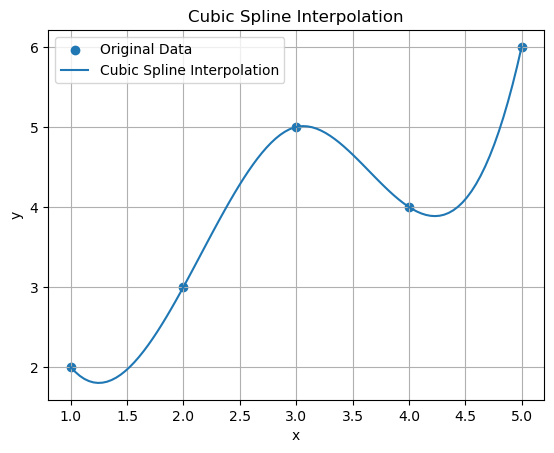

In [22]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt

# Define original data points
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 5, 4, 6])

# Perform cubic spline interpolation
cs = CubicSpline(x, y)

# Generate x-values for plotting
x_interp = np.linspace(1, 5, 100)

# Interpolate y-values using the cubic spline
y_interp = cs(x_interp)

# Plot original data points and interpolated curve
plt.scatter(x, y, label='Original Data')
plt.plot(x_interp, y_interp, label='Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Spline Interpolation')
plt.legend()
plt.grid(True)
plt.show()


In [23]:
from scipy.interpolate import UnivariateSpline
import numpy as np

xs = np.arange(10)
ys = xs**2 + np.sin(xs) + 1

interp_func = UnivariateSpline(xs, ys)

newarr = interp_func(np.arange(2.1, 3, 0.1))

print(newarr)


[5.62826474 6.03987348 6.47131994 6.92265019 7.3939103  7.88514634
 8.39640439 8.92773053 9.47917082]


# rbf

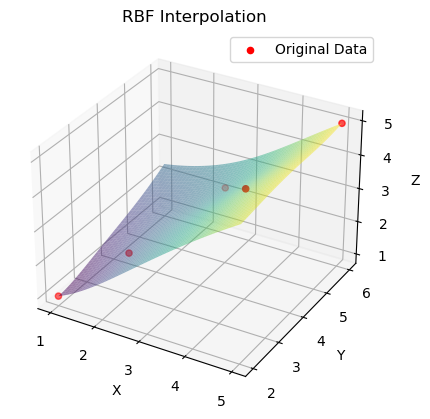

In [24]:
from scipy.interpolate import Rbf
import numpy as np
import matplotlib.pyplot as plt

# Define original data points
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 5, 4, 6])
z = np.array([1, 2, 3, 4, 5])  # z-coordinate (optional)

# Perform RBF interpolation
rbf = Rbf(x, y, z)

# Generate grid points for interpolation
x_interp = np.linspace(1, 5, 100)
y_interp = np.linspace(2, 6, 100)
X, Y = np.meshgrid(x_interp, y_interp)
Z = rbf(X, Y)

# Plot original data points and interpolated surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, color='red', label='Original Data')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('RBF Interpolation')
ax.legend()
plt.show()
